In [127]:
import matplotlib.pyplot as plt
import os,cv2
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import  cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report

In [128]:
from PIL import Image
def load_images(folder):
    image_list = []
    for filename in os.listdir(folder):
        image = Image.open(os.path.join(folder,filename))
        image = np.array(image.convert('L')) 
        image = image / 255 
        print(image.shape)
        print(image)
        if image is not None:
            image_list.append(image)
    return image_list

In [129]:
data=[]
FolderName = "att_faces"
for i in range(1,41):
    for j in load_images(os.path.join(FolderName,"s"+str(i))):
        data.append(list((j,i)))

(112, 92)
[[0.18823529 0.19215686 0.17647059 ... 0.21960784 0.21960784 0.21176471]
 [0.17647059 0.20392157 0.15294118 ... 0.20392157 0.19607843 0.2       ]
 [0.17647059 0.19607843 0.16470588 ... 0.18823529 0.20784314 0.19607843]
 ...
 [0.19607843 0.18823529 0.19607843 ... 0.17647059 0.18039216 0.18039216]
 [0.17647059 0.21176471 0.19215686 ... 0.18039216 0.18431373 0.18431373]
 [0.2        0.2        0.2        ... 0.18431373 0.18039216 0.18039216]]
(112, 92)
[[0.13333333 0.13333333 0.12941176 ... 0.00392157 0.00392157 0.00392157]
 [0.1372549  0.11764706 0.1254902  ... 0.14901961 0.18431373 0.15294118]
 [0.13333333 0.10980392 0.12156863 ... 0.21568627 0.23137255 0.19215686]
 ...
 [0.11764706 0.11372549 0.12156863 ... 0.1372549  0.14509804 0.16078431]
 [0.12156863 0.11372549 0.1254902  ... 0.16470588 0.13333333 0.15294118]
 [0.10980392 0.12941176 0.10588235 ... 0.14509804 0.15686275 0.12941176]]
(112, 92)
[[0.23529412 0.23529412 0.24313725 ... 0.15686275 0.20784314 0.18039216]
 [0.22745

(112, 92)
[[0.44705882 0.42745098 0.43921569 ... 0.45882353 0.42745098 0.43529412]
 [0.44313725 0.42745098 0.43921569 ... 0.43529412 0.43529412 0.43529412]
 [0.42745098 0.43137255 0.43529412 ... 0.44313725 0.42745098 0.44313725]
 ...
 [0.14901961 0.12941176 0.11764706 ... 0.16470588 0.1254902  0.12156863]
 [0.1372549  0.10196078 0.1372549  ... 0.13333333 0.18431373 0.16470588]
 [0.09411765 0.11764706 0.14901961 ... 0.14509804 0.1372549  0.14901961]]
(112, 92)
[[0.37254902 0.39607843 0.38823529 ... 0.42745098 0.42745098 0.43137255]
 [0.38431373 0.38039216 0.38823529 ... 0.43137255 0.42352941 0.43529412]
 [0.38431373 0.38431373 0.37254902 ... 0.43529412 0.43137255 0.42745098]
 ...
 [0.24313725 0.20784314 0.23921569 ... 0.09803922 0.16470588 0.15294118]
 [0.18823529 0.27058824 0.24313725 ... 0.12156863 0.17647059 0.16862745]
 [0.21568627 0.25490196 0.18039216 ... 0.15686275 0.16470588 0.20784314]]
(112, 92)
[[0.43529412 0.41568627 0.41568627 ... 0.43529412 0.42352941 0.41960784]
 [0.42352

 [0.83529412 0.83137255 0.81960784 ... 0.89019608 0.40784314 0.49019608]]
(112, 92)
[[0.21960784 0.22745098 0.19607843 ... 0.21568627 0.18823529 0.21176471]
 [0.21960784 0.19215686 0.23137255 ... 0.2        0.20784314 0.18431373]
 [0.20392157 0.21568627 0.22352941 ... 0.21176471 0.18431373 0.21568627]
 ...
 [0.49411765 0.53333333 0.54901961 ... 0.28627451 0.54509804 0.78431373]
 [0.50196078 0.5254902  0.43921569 ... 0.3372549  0.3372549  0.79215686]
 [0.60784314 0.47843137 0.43137255 ... 0.24705882 0.29411765 0.74117647]]
(112, 92)
[[0.20784314 0.22745098 0.20784314 ... 0.18823529 0.20784314 0.20784314]
 [0.21176471 0.21568627 0.25098039 ... 0.19607843 0.19607843 0.19215686]
 [0.21960784 0.22352941 0.21960784 ... 0.20392157 0.18823529 0.21176471]
 ...
 [0.48235294 0.51764706 0.42745098 ... 0.78039216 0.54901961 0.39607843]
 [0.47843137 0.57254902 0.27843137 ... 0.79215686 0.54901961 0.31764706]
 [0.41176471 0.58039216 0.30196078 ... 0.76470588 0.47843137 0.29803922]]
(112, 92)
[[0.2156

(112, 92)
[[0.14509804 0.14117647 0.13333333 ... 0.11764706 0.12941176 0.13333333]
 [0.17254902 0.1372549  0.15686275 ... 0.13333333 0.12156863 0.14901961]
 [0.15686275 0.1372549  0.16470588 ... 0.11764706 0.12941176 0.1372549 ]
 ...
 [0.84313725 0.65490196 0.60392157 ... 0.78823529 0.82745098 0.65098039]
 [0.8        0.62352941 0.64313725 ... 0.72941176 0.83137255 0.74117647]
 [0.74117647 0.60784314 0.70196078 ... 0.62745098 0.81176471 0.82352941]]
(112, 92)
[[0.38823529 0.40392157 0.38431373 ... 0.36078431 0.36078431 0.36078431]
 [0.39215686 0.4        0.39607843 ... 0.36470588 0.36078431 0.35294118]
 [0.39607843 0.4        0.4        ... 0.36078431 0.36078431 0.35294118]
 ...
 [0.40784314 0.60392157 0.54509804 ... 0.56078431 0.58039216 0.61568627]
 [0.39607843 0.57647059 0.60392157 ... 0.60784314 0.54509804 0.58431373]
 [0.40784314 0.58039216 0.62745098 ... 0.63529412 0.47843137 0.47843137]]
(112, 92)
[[0.38039216 0.38823529 0.38431373 ... 0.34117647 0.31764706 0.3372549 ]
 [0.39607

In [130]:
df = pd.DataFrame(data,columns=['Image','Label'])

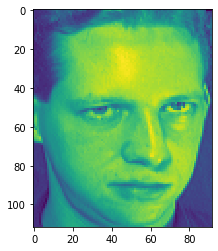

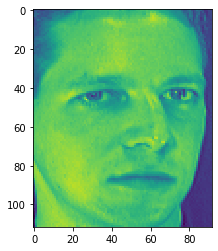

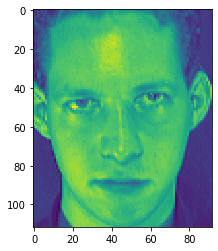

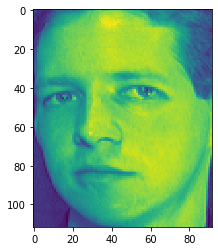

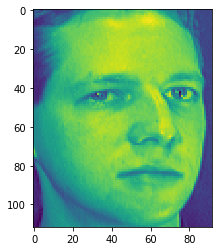

In [131]:
for i in range (1,6,1):
    plt.imshow(df['Image'][i])
    plt.show()

### Image Statistics

In [132]:
df

,Image,Label
0,"[[0.18823529411764706, 0.19215686274509805, 0....",1
1,"[[0.13333333333333333, 0.13333333333333333, 0....",1
2,"[[0.23529411764705882, 0.23529411764705882, 0....",1
3,"[[0.15294117647058825, 0.17254901960784313, 0....",1
4,"[[0.24705882352941178, 0.20784313725490197, 0....",1
5,"[[0.25098039215686274, 0.2980392156862745, 0.3...",1
6,"[[0.16862745098039217, 0.19607843137254902, 0....",1
7,"[[0.1607843137254902, 0.1843137254901961, 0.18...",1
8,"[[0.17254901960784313, 0.16862745098039217, 0....",1
9,"[[0.16470588235294117, 0.1607843137254902, 0.1...",1


In [133]:
df.shape

(400, 2)

In [134]:
df.describe()

,Label
count,400.000000
mean,20.500000
std,11.557853
min,1.000000
25%,10.750000
50%,20.500000
75%,30.250000
max,40.000000


In [135]:
print(df['Image'][0].shape)

(112, 92)


// All 400 images are of dimension (112,92)  //

### Converting these 400 images into an matrix of vectors

In [136]:
image_Count=len(df['Image'])
for i in range(image_Count):
    img = df['Image'][i]
    df['Image'][i] = img.reshape(img.shape[0]*img.shape[1])

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [137]:
df['Image'][1]

array([0.13333333, 0.13333333, 0.12941176, ..., 0.14509804, 0.15686275,
       0.12941176])

In [138]:
train_image = []
train_label = []

In [139]:
test_image = []
test_label = []

 For every 10 images, 1 is taken for testing and the other 9 for training, retaining 95% of variance

In [140]:
split=[10*i for i in range(1,41) ]
for i in range(0,400):
    if(i>0  and (i+1 in  split)):
        test_image.append(df['Image'][i])
        test_label.append(df['Label'][i])
    else:
        train_image.append(df['Image'][i])
        train_label.append(df['Label'][i])

In [141]:
train_vectors = []
for i in train_image:
    train_vectors.append(i.tolist())

In [142]:
test_vectors = []
for j in test_image:
    test_vectors.append(j.tolist())

In [143]:
for i in range(360):
    for j in range(10304):
        train_vectors[i][j]=np.asscalar(np.asarray(train_vectors[i][j]))

In [144]:
for i in range(40):
    for j in range(10304):
        test_vectors[i][j]=np.asscalar(np.asarray(test_vectors[i][j]))

In [145]:
images_Matrix = np.matrix(train_vectors)

In [146]:
pca = decomposition.PCA(.95)

In [147]:
pca.fit(images_Matrix)
pca.n_components_

176

In [148]:
train_image = pca.transform(np.asmatrix(train_vectors,dtype='float64'))
test_image = pca.transform(np.asmatrix(test_vectors,dtype='float64'))

In [149]:
logisticRegr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')

In [150]:
logisticRegr.fit(train_image, train_label)

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
print(test_label[:])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [152]:
logisticRegr.predict(test_image[:])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39,  5], dtype=int64)

Accuracy after logistic regression

In [153]:
logisticRegr.score(test_image[:], test_label)

0.95

Cross Validation

In [154]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='micro'),
           'recall' : make_scorer(recall_score,average='micro'), 
           'f1_score' : make_scorer(f1_score,average='micro')}


image_vectors = np.matrix(df['Image']) 
label = np.matrix(df['Label']) 
model = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(train_image,train_label)

In [155]:
skf=StratifiedKFold(n_splits=9, random_state=0)
results = cross_validate(estimator=model,
                                          X=train_image,
                                          y=train_label,
                                          cv=skf,
                                          scoring=scoring)
CVResultsdf=pd.DataFrame.from_dict(results)

In [156]:
CVResultsdf

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.424829,0.002992,0.975,0.975,0.975,0.975
1,0.482709,0.002992,0.975,0.975,0.975,0.975
2,0.415888,0.002993,1.000,1.000,1.000,1.000
3,0.458773,0.001995,1.000,1.000,1.000,1.000
4,0.469743,0.002993,1.000,1.000,1.000,1.000
5,0.498667,0.003989,1.000,1.000,1.000,1.000
6,0.496671,0.003990,0.975,0.975,0.975,0.975
7,0.473732,0.001995,0.950,0.950,0.950,0.950
8,0.573467,0.005985,0.950,0.950,0.950,0.950


Average precision score

In [157]:
Average_Precision = CVResultsdf.test_precision.mean()

In [158]:
print(Average_Precision)

0.9805555555555555


Average Recall score

In [159]:
Average_Recall = CVResultsdf.test_recall.mean()

In [160]:
print(Average_Recall)

0.9805555555555555


Average F1 score

In [161]:
Average_F1Score = CVResultsdf.test_f1_score.mean()

In [162]:
print(Average_F1Score)

0.9805555555555555


In [163]:
model = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(train_image,train_label)
models = [model]
names = ["Logistic Regression"]

In [164]:
def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, average='micro'), 
            recall_score(y, yPred, average='micro'),
           f1_score(y, yPred, average='micro'))

In [165]:
def my_scorer(estimator, x, y):
    a, p, r ,f1 = getScores(estimator, x, y)
    return f1

In [166]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)} 

In [167]:
for model, name in zip(models, names):
    print (name)
    start = time.time()
    cv_score = cross_val_score(model, train_image, train_label,scoring=my_scorer, cv=9)
    print(cv_score)
    Avg_F1Score = cv_score.mean()
    print('Average F1 score')
    print (Avg_F1Score)

Logistic Regression
[0.975 0.975 1.    1.    1.    1.    0.975 0.95  0.95 ]
Average F1 score
0.9805555555555555


In [168]:
pred=[]
i=1
for img in test_image:
    a=model.predict(img.reshape(1,-1))
    pred.append(a)
    i+=1
print(classification_report(test_label, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
